In [1]:
#https://pythonprogramming.net/dataset-data-analysis-python-pandas-tutorial/?completed=/input-output-data-analysis-python-pandas-tutorial/
#P7-P11

import pandas as pd
import quandl
from bs4 import BeautifulSoup
import requests as rq
import pickle

quandl.ApiConfig.api_key = "9HDao6PP9PWSTZNAAAaR"

In [2]:
df = quandl.get("FMAC/HPI_TX")
df.head()

#df.columns =["TX"]
#df['TX'] = (df['TX']-df['TX'][0]) / df['TX'][0] * 100.0
#df["TX"] = (df['TX']-df['TX'][0])/df['TX'][0] * 100.0
#df.iloc[:, 0] = (df.iloc[:, 0]-df.iloc[0, 0])/df.iloc[0, 0] * 100.0
df['TX'] = (df.iloc[:, 0] - df.iloc[0, 0])/df.iloc[0, 0] * 100.0
    #df[i] = (df[i]-df[i][0])/df[i][0] * 100.0
    #df.columns = [i]

df

,Value,TX
Date,,
1975-01-31,32.659989,0.000000
1975-02-28,32.970745,0.951488
1975-03-31,33.542148,2.701039
1975-04-30,34.383316,5.276570
1975-05-31,34.652016,6.099286
1975-06-30,34.254694,4.882747
1975-07-31,33.988356,4.067261
1975-08-31,33.970148,4.011509
1975-09-30,34.055459,4.272719


In [3]:
# We want to repeat the query above for every state (mutate the last two letters for the corresponding state) 
# and then stack the columns

# Parse the wiki table
url = "https://simple.wikipedia.org/wiki/List_of_U.S._states"
response = rq.get(url)
soup = BeautifulSoup(response.text, 'lxml')
table = soup.find_all('table')[0]
rows = table.find_all('tr')[1:]

In [4]:
# Prepare a library for constructing pd dataframe
data = {
    'Abbreviation' : [],
    'State Name' : [],
    'Capital' : [],
    'Became a State' : []
}

for row in rows:
    cols = row.find_all('td')
    data['Abbreviation'].append( cols[0].get_text() )
    data['State Name'].append( cols[1].get_text() )
    data['Capital'].append( cols[2].get_text() )
    data['Became a State'].append( cols[3].get_text() )
    
fiddy_states = pd.DataFrame(data)

fiddy_states.tail()

,Abbreviation,Became a State,Capital,State Name
45,VA,"June 25, 1788",Richmond,Virginia
46,WA,"November 11, 1889",Olympia,Washington
47,WV,"June 20, 1863",Charleston,West Virginia
48,WI,"May 29, 1848",Madison,Wisconsin
49,WY,"July 10, 1890",Cheyenne,Wyoming


In [5]:
# Concatenate indicator name and state name
main_df = pd.DataFrame()
for i in fiddy_states["Abbreviation"]:
    query = "FMAC/HPI_" + str(i)
    df = quandl.get(query)
    df.columns = [i] 
    
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df)
        
main_df.head()


,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.324038,34.400087,28.886571,36.838213,15.665713,19.666460,24.530646,27.146975,30.903838,30.862154,...,37.861487,32.210851,32.659989,24.603939,26.556884,27.954539,17.480301,41.248346,28.142079,31.820164
1975-02-28,35.545343,34.911194,29.374322,37.149935,15.721510,19.894520,25.051659,27.185646,32.121077,30.583518,...,37.445064,32.246969,32.970745,24.947973,26.807912,28.230531,17.549796,42.277521,28.537453,32.277898
1975-03-31,35.803942,35.434316,29.828662,37.420977,15.912556,20.118681,25.443161,27.252283,33.931871,30.466267,...,37.021567,32.329769,33.542148,25.258222,27.050106,28.431856,17.657853,43.349320,28.927629,32.762841
1975-04-30,36.120498,35.980265,30.179479,37.642638,16.225479,20.327062,25.663172,27.389022,36.149709,30.532432,...,36.601128,32.457447,34.383316,25.504964,27.270090,28.580271,17.787585,44.454450,29.277377,33.266394
1975-05-31,36.421849,36.576786,30.371230,37.864617,16.486814,20.497741,25.733086,27.622613,36.433117,30.653270,...,36.220049,32.606660,34.652016,25.668351,27.463349,28.704849,17.904450,45.566959,29.562586,33.755117


In [6]:
# Pickle the final table

pickle_out = open('fiddy_states.pickle','wb')
pickle.dump(main_df, pickle_out)
pickle_out.close()   

In [7]:
# Load data from pickle
#HPI_data.to_pickle(pickle.pickle)
HPI_data = pd.read_pickle('fiddy_states.pickle')
HPI_data.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.324038,34.400087,28.886571,36.838213,15.665713,19.666460,24.530646,27.146975,30.903838,30.862154,...,37.861487,32.210851,32.659989,24.603939,26.556884,27.954539,17.480301,41.248346,28.142079,31.820164
1975-02-28,35.545343,34.911194,29.374322,37.149935,15.721510,19.894520,25.051659,27.185646,32.121077,30.583518,...,37.445064,32.246969,32.970745,24.947973,26.807912,28.230531,17.549796,42.277521,28.537453,32.277898
1975-03-31,35.803942,35.434316,29.828662,37.420977,15.912556,20.118681,25.443161,27.252283,33.931871,30.466267,...,37.021567,32.329769,33.542148,25.258222,27.050106,28.431856,17.657853,43.349320,28.927629,32.762841
1975-04-30,36.120498,35.980265,30.179479,37.642638,16.225479,20.327062,25.663172,27.389022,36.149709,30.532432,...,36.601128,32.457447,34.383316,25.504964,27.270090,28.580271,17.787585,44.454450,29.277377,33.266394
1975-05-31,36.421849,36.576786,30.371230,37.864617,16.486814,20.497741,25.733086,27.622613,36.433117,30.653270,...,36.220049,32.606660,34.652016,25.668351,27.463349,28.704849,17.904450,45.566959,29.562586,33.755117


<module 'matplotlib.pyplot' from 'C:\\Users\\jguo\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

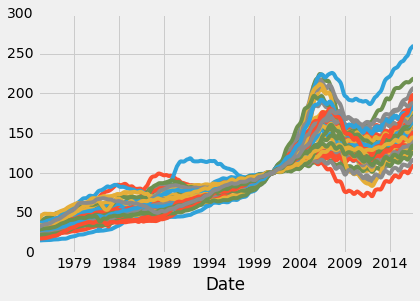

In [8]:
# P8
# Visualize
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import style
style.use('fivethirtyeight')

HPI_data.plot()
plt.legend().remove()
plt

In [9]:
# Note  the chart above at year 2000 (where index 100 is set)
# Change the data frame to be percentage change from the previous value (pandas.DataFrame.pct_change)
main_df = pd.DataFrame()
for i in fiddy_states["Abbreviation"]:
    query = "FMAC/HPI_" + str(i)
    #Here's the difference
    df = quandl.get(query).pct_change()
    df.columns = [i] 
    
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df)


In [10]:
pickle_out = open('fiddy_states2.pickle','wb')
pickle.dump(main_df, pickle_out)
pickle_out.close()

<module 'matplotlib.pyplot' from 'C:\\Users\\jguo\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

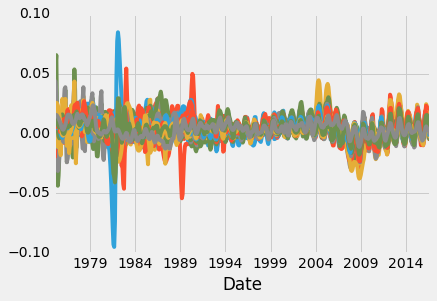

In [11]:
HPI_data = pd.read_pickle('fiddy_states2.pickle')

HPI_data.plot()
plt.legend().remove()
plt

In [12]:
# What if we want change from the starting point

main_df = pd.DataFrame()
for i in fiddy_states["Abbreviation"]:
    query = "FMAC/HPI_" + str(i)
    df = quandl.get(query)
    df.columns = [i]
    #Here's the difference
    df[i] = (df[i]-df[i][0])/df[i][0] * 100.0 
    
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df)

In [13]:
pickle_out = open('fiddy_states3.pickle','wb')
pickle.dump(main_df, pickle_out)
pickle_out.close()

In [14]:
# Set a benchmark: US HPI
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA")
    df.columns = ["United States"]
    df["United States"] = (df["United States"]-df["United States"][0]) / df["United States"][0] * 100.0
    return df

<module 'matplotlib.pyplot' from 'C:\\Users\\jguo\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

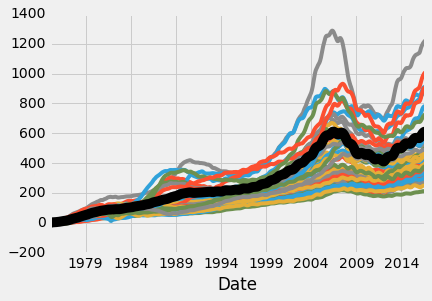

In [15]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('fiddy_states3.pickle')
benchmark = HPI_Benchmark()

HPI_data.plot(ax=ax1)
benchmark.plot(color='k',ax=ax1, linewidth=10)

plt.legend().remove()
plt

In [16]:
# Calculate correlation among states
HPI_data = pd.read_pickle('fiddy_states3.pickle')
HPI_State_Correlation = HPI_data.corr()
HPI_State_Correlation.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
AL,1.000000,0.946418,0.937592,0.995119,0.942310,0.965541,0.953146,0.982824,0.929395,0.978346,...,0.976382,0.994551,0.940841,0.979483,0.978591,0.975277,0.985060,0.982097,0.991161,0.946695
AK,0.946418,1.000000,0.910237,0.967983,0.921818,0.960382,0.884600,0.938068,0.900713,0.899525,...,0.974957,0.958200,0.980514,0.963944,0.956485,0.962226,0.958805,0.972376,0.930831,0.987373
AZ,0.937592,0.910237,1.000000,0.936454,0.976776,0.919486,0.917688,0.948801,0.994380,0.949167,...,0.906742,0.932276,0.896961,0.936448,0.924615,0.958568,0.956881,0.919514,0.935717,0.909381
AR,0.995119,0.967983,0.936454,1.000000,0.945774,0.976929,0.944746,0.977921,0.928081,0.968410,...,0.986937,0.995595,0.962400,0.982990,0.981747,0.979944,0.984041,0.990395,0.986244,0.964090
CA,0.942310,0.921818,0.976776,0.945774,1.000000,0.938870,0.942463,0.967911,0.985869,0.951573,...,0.930504,0.945515,0.917953,0.928609,0.956815,0.979699,0.965064,0.936562,0.945139,0.919537


In [17]:
# Too hard to see with 50x50 matrix... maybe use ".describe()"
HPI_State_Correlation.describe()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.969390,0.939254,0.932725,0.971255,0.945922,0.954348,0.931882,0.963441,0.929353,0.952846,...,0.959597,0.970207,0.934608,0.957006,0.962476,0.966222,0.968089,0.963197,0.964652,0.938707
std,0.026771,0.043011,0.028004,0.026940,0.024992,0.030143,0.039163,0.028701,0.031940,0.027883,...,0.036501,0.027137,0.041258,0.032387,0.031305,0.026768,0.024518,0.033389,0.026356,0.045041
min,0.872598,0.771111,0.846203,0.861622,0.870084,0.838751,0.823583,0.864550,0.832715,0.849939,...,0.809349,0.856773,0.790516,0.848739,0.838633,0.846263,0.871264,0.829693,0.882989,0.767608
25%,0.955706,0.929268,0.917464,0.965063,0.931971,0.939007,0.906786,0.951062,0.910937,0.944930,...,0.951716,0.959443,0.918030,0.942818,0.956373,0.961856,0.958991,0.954276,0.954982,0.920940
50%,0.977250,0.949213,0.934992,0.978021,0.945327,0.960939,0.938386,0.970821,0.928931,0.956737,...,0.970435,0.976100,0.941914,0.962631,0.970180,0.974227,0.974781,0.975255,0.970017,0.950024
75%,0.986240,0.963171,0.947947,0.989024,0.964504,0.975201,0.958892,0.980512,0.950018,0.970793,...,0.983220,0.987883,0.962254,0.981117,0.979128,0.979089,0.983281,0.985194,0.984698,0.964382
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Let's test with Texas and resample('A') - year end average
# For more options, check http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
TX1yr = HPI_data['TX'].resample('A').mean()
TX1yr.head()

Date
1975-12-31     4.001836
1976-12-31    11.464859
1977-12-31    22.668530
1978-12-31    40.861312
1979-12-31    63.444913
Freq: A-DEC, Name: TX, dtype: float64

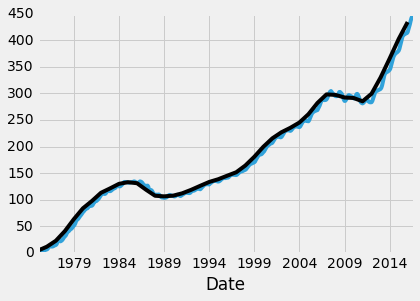

In [19]:
#plot raw data and annual data
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data['TX'].plot(ax=ax1)
TX1yr.plot(color='k',ax=ax1)

plt.legend().remove()

In [20]:
# Combine the annual data with monthly data
HPI_data['TX1yr'] = HPI_data['TX'].resample('A').mean()
print(HPI_data[['TX','TX1yr']])

                    TX       TX1yr
Date                              
1975-01-31    0.000000         NaN
1975-02-28    0.951488         NaN
1975-03-31    2.701039         NaN
1975-04-30    5.276570         NaN
1975-05-31    6.099286         NaN
1975-06-30    4.882747         NaN
1975-07-31    4.067261         NaN
1975-08-31    4.011509         NaN
1975-09-30    4.272719         NaN
1975-10-31    4.606024         NaN
1975-11-30    5.261535         NaN
1975-12-31    5.891854    4.001836
1976-01-31    6.301948         NaN
1976-02-29    7.219763         NaN
1976-03-31    9.422551         NaN
1976-04-30   12.572041         NaN
1976-05-31   13.553547         NaN
1976-06-30   12.362672         NaN
1976-07-31   11.779576         NaN
1976-08-31   11.780492         NaN
1976-09-30   12.048459         NaN
1976-10-31   12.698906         NaN
1976-11-30   13.620130         NaN
1976-12-31   14.218217   11.464859
1977-01-31   14.742006         NaN
1977-02-28   16.188283         NaN
1977-03-31   19.5505

In [21]:
# To drop rows with any NaN, use DataFrame.dropna(inplace=True)
# To drop rows with all NaN, use DataFrame.dropna(how='all', inplace=True)

# To fill NaN, use fillna()
TX_data = HPI_data.copy()
TX_data['TX1yr'] = TX_data['TX'].resample('A').mean()
TX_data = TX_data[['TX', 'TX1yr']]

TX_data.fillna(method='ffill', inplace=True)  #ffill is forward fill
TX_data.head(20)

,TX,TX1yr
Date,,
1975-01-31,0.000000,NaN
1975-02-28,0.951488,NaN
1975-03-31,2.701039,NaN
1975-04-30,5.276570,NaN
1975-05-31,6.099286,NaN
1975-06-30,4.882747,NaN
1975-07-31,4.067261,NaN
1975-08-31,4.011509,NaN
1975-09-30,4.272719,NaN


<module 'matplotlib.pyplot' from 'C:\\Users\\jguo\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

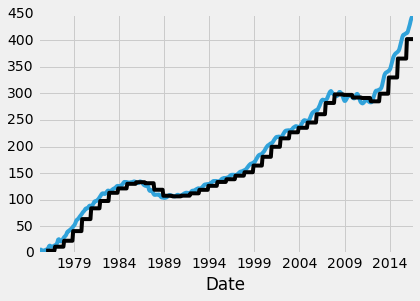

In [22]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

TX_data['TX'].plot(ax=ax1)
TX_data['TX1yr'].plot(color='k',ax=ax1)
plt.legend().remove()
plt

In [23]:
# Rolling average and rolling std

TX_data['TX12MA'] =TX_data.TX.rolling(window=12).mean()
TX_data['TX12STD'] =TX_data.TX.rolling(window=12).std()
TX_data.head(20)

,TX,TX1yr,TX12MA,TX12STD
Date,,,,
1975-01-31,0.000000,NaN,NaN,NaN
1975-02-28,0.951488,NaN,NaN,NaN
1975-03-31,2.701039,NaN,NaN,NaN
1975-04-30,5.276570,NaN,NaN,NaN
1975-05-31,6.099286,NaN,NaN,NaN
1975-06-30,4.882747,NaN,NaN,NaN
1975-07-31,4.067261,NaN,NaN,NaN
1975-08-31,4.011509,NaN,NaN,NaN
1975-09-30,4.272719,NaN,NaN,NaN


<module 'matplotlib.pyplot' from 'C:\\Users\\jguo\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

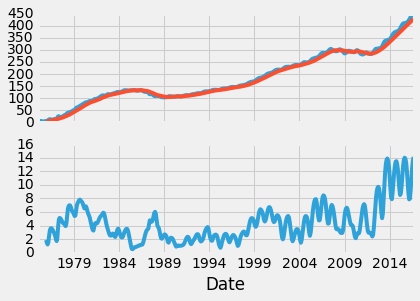

In [24]:
# Plot rolling average and rolling std

fig = plt.figure()

ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

TX_data['TX'].plot(ax=ax1)
TX_data['TX12MA'].plot(ax=ax1)
TX_data['TX12STD'].plot(ax=ax2)

#plt.legend().remove()
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\jguo\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

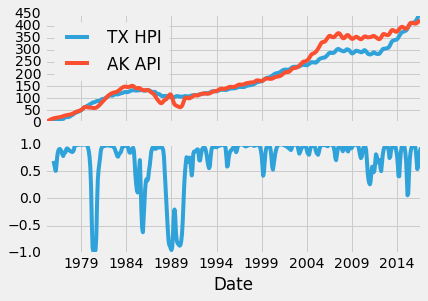

In [25]:
# Plot Texas and another state and their rolling correlation
TX_AK_12corr = HPI_data['TX'].rolling(window=12).corr(HPI_data['AK'])

fig = plt.figure()

ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

HPI_data['TX'].plot(ax=ax1, label="TX HPI") #specify label
HPI_data['AK'].plot(ax=ax1, label="AK API")
ax1.legend(loc="best") #set location of the legend

TX_AK_12corr.plot(ax=ax2)

plt